## 웹 스크래핑 실습 및 csv 파일 작성과 이미지 스크래핑

In [4]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from urllib.error import HTTPError
from urllib.error import URLError
import pandas as pd

In [5]:
url = 'https://www.imdb.com/title/tt4154756/reviews?ref_=tt_ql_3'

try :
    html = urlopen(url)
except HTTPError as he :
    print('http error')
except URLError as ue :
    print('url error')
else :
    soup = BeautifulSoup(html.read(), 'html.parser')

In [42]:
review_list = soup.find_all('div', {'class' : 'imdb-user-review'})
# review_list

[<div class="lister-item mode-detail imdb-user-review collapsable" data-review-id="rw5504583" data-vote-url="/title/tt4154756/review/rw5504583/vote/interesting">
 <div class="review-container">
 <div class="lister-item-content">
 <div class="ipl-ratings-bar">
 <span class="rating-other-user-rating">
 <svg class="ipl-icon ipl-star-icon " fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
 <path d="M0 0h24v24H0z" fill="none"></path>
 <path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z"></path>
 <path d="M0 0h24v24H0z" fill="none"></path>
 </svg>
 <span>9</span><span class="point-scale">/10</span>
 </span>
 </div>
 <a class="title" href="/review/rw5504583/"> Great
 </a> <div class="display-name-date">
 <span class="display-name-link"><a href="/user/ur87850731/">MR_Heraclius</a></span><span class="review-date">23 February 2020</span>
 </div>
 <div class="content">
 <div class="text show-more__control">

### 자연어 처리 기초
- 꼬고마
- 한나눔
- 트위터

In [10]:
from konlpy.tag import Kkma

In [19]:
kkoma = Kkma()

# 명사를 기준으로 분석
kkoma.nouns('한국어 문장 분석을 시작합니다. 재미있어요~~')

['한국어', '문장', '분석']

In [18]:
# 문장을 기준으로 분석
kkoma.sentences('한국어 문장 분석을 시작합니다. 재미있어요~~')

['한국어 문장 분석을 시작합니다.', '재미있어요~~']

In [17]:
# 형태소를 기준으로 분석
kkoma.pos('한국어 문장 분석을 시작합니다. 재미있어요~~')

[('한국어', 'NNG'),
 ('문장', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('.', 'SF'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

In [26]:
# wordcloud
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

In [24]:
text = open('./data/07. alice.txt').read()
# text

'癤풮roject Gutenberg\'s Alice\'s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice\'s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE\'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE\'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and what i

In [27]:
alice_mask = np.array(Image.open('./images/07. alice_mask.png'))
# alice_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [29]:
# 시각화 패키지
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

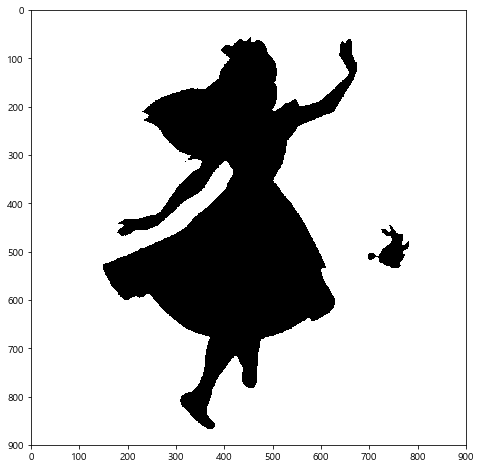

In [32]:
# 그림 시각화
plt.figure(figsize = (8, 8))
plt.imshow(alice_mask, cmap = plt.cm.gray)
plt.show()

In [34]:
# 불용어 만들기(추가)
sw = set(STOPWORDS)
sw.add('said')

wc = WordCloud(background_color = 'white', max_words = 2000, mask = alice_mask, stopwords = sw)

In [35]:
# text 를 설정한 wordcloud에 적용
wc = wc.generate(text)
# wc.words_

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.27595628415300544,
 'know': 0.2459016393442623,
 'went': 0.226775956284153,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'well': 0.1721311475409836,
 'now': 0.16393442622950818,
 'head': 0.16393442622950818,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'come': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Mouse': 0.12021857923497267,
 'Duchess': 0.11475

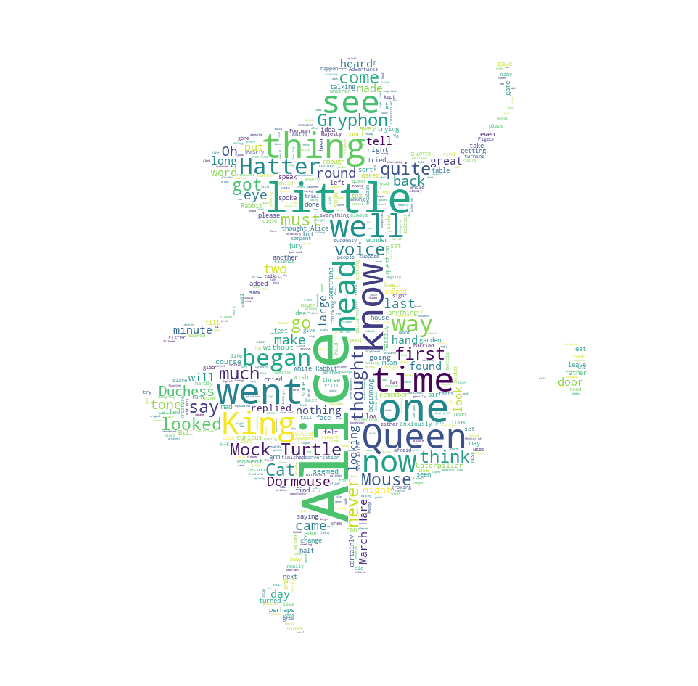

In [40]:
# wordcloud 시각화
plt.figure(figsize = (12, 12))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [41]:
# 점수(별점), 리뷰제목, 작성자, 작성날짜, 리뷰내용
# 감정분석(VADER) - NLTK
# good +0.1, awful -0.1, perfect +0.2 -> 문장에서 저런 단어가 추출되면 나올때마다 점수를 더하고 빼서 점수가 양수면 긍정, 음수면 부정

from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

# 감성분석 함수 적용
sid = SentimentIntensityAnalyzer()

D:\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\최우석\AppData\Roaming\nltk_data...


In [66]:
data = []
sum_review = ''

for review in review_list :
    score = review.find('span').get_text().replace('\n', '')
    # print(score)
    title = review.find('a').get_text().replace('\n', '').strip()
    # print(title)
    writer = review.find('span', 'display-name-link').get_text()
    # print(writer)
    date = review.find('span', 'review-date').get_text()
    # print(date)
    content = review.find('div', 'show-more__control').get_text()
    # print(content)
    # print()
    
    sum_review = sum_review + content
    lines_list = tokenize.sent_tokenize(content)
    sum = 0
    
    # polarity_scores() : 문장을 단어별로 분석해서 긍정, 부정, 중립에 대한 점수를 계산하고 종합 점수를 반환
    for sent in lines_list :
        ss = sid.polarity_scores(sent)
        sum = sum + ss['compound']
    
    sum1 = str(sum / len(lines_list))
    data.append([score, title, writer, date, content, sum1])

In [64]:
with open('./data/service_imdb_wordcloud.csv', 'w', encoding = 'utf-8') as file :
    file.write('score,title,writer,date,content,sum\n')
    
    # data를 반복해서 저장
    for idx in data :
        file.write('{},{},{},{},{},{}\n'.format(idx[0], idx[1], idx[2], idx[3], idx[4], idx[5]))

In [83]:
# pandas로 저장해보기

data = []

score_list = []
title_list = []
writer_list = []
date_list = []
content_list = []
sum_list = []

sum_review = ''

for review in review_list :
    score = review.find('span').get_text().replace('\n', '')
    score_list.append(score)
    # print(score)
    title = review.find('a').get_text().replace('\n', '').strip()
    title_list.append(title)
    # print(title)
    writer = review.find('span', 'display-name-link').get_text()
    writer_list.append(writer)
    # print(writer)
    date = review.find('span', 'review-date').get_text()
    date_list.append(date)
    # print(date)
    content = review.find('div', 'show-more__control').get_text()
    content_list.append(content)
    # print(content)
    # print()
    
    sum_review = sum_review + content
    
    # content 를 문장별로 나누어서 저장
    lines_list = tokenize.sent_tokenize(content)
    sum = 0
    
    # polarity_scores() : 문장을 단어별로 분석해서 긍정, 부정, 중립에 대한 점수를 계산하고 종합 점수를 반환
    for sent in lines_list :
        ss = sid.polarity_scores(sent)
        sum = sum + ss['compound']
    
    sum1 = str(sum / len(lines_list))
    sum_list.append(sum1)

    
reviewDf = pd.DataFrame({
    'score' : score_list,
    'title' : title_list,
    'writer' : writer_list,
    'date' : date_list,
    'content' : content_list,
    'polarity' : sum_list
})

reviewDf.to_csv('./data/reviewDf.csv', mode = 'w', encoding = 'utf-8')
reviewDf.head()

,score,title,writer,date,content,polarity
0,9/10,Great,MR_Heraclius,23 February 2020,This movie portrays a villain that by far has ...,-0.06573333333333331
1,10/10,Way better than endgame,michaelhowell12,2 September 2019,This film is way better than endgame!\nThe act...,0.5872857142857143
2,10/10,IT'S NOT A MASTERPIECE..,ProfGenki,31 August 2020,..but still 10/10. Or 9.5 if its possible.The ...,0.3859333333333333
3,10/10,Somehow they pulled this off,Jesper2801,26 April 2018,I consider myself a big comic book marvel fan....,0.22276249999999997
4,10/10,Unlike anything ever done in the history of ci...,kjames-26542,14 August 2018,This movie is the beginning of the culmination...,-0.012816666666666652


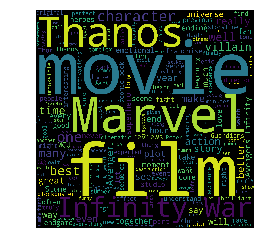

In [72]:
# review 들로 wordcloud 진행
wordcloud = WordCloud(width = 2500, height = 2500, stopwords = set(STOPWORDS)).generate(sum_review)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()